# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user_df = pd.read_csv('takehome_users.csv')
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_eng_df = pd.read_csv('takehome_user_engagement.csv')
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Data Cleaning

In [4]:
print(user_df.shape, user_eng_df.shape)

(12000, 10) (207917, 3)


In [5]:
# Check dtypes
user_df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [6]:
# Convert creation_time column from object to datetime with its current format (yyyy-mm-dd hh:mm:ss)
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])

# Convert last_session_creation_time column from unix timestamp to yyy-mm-dd hh:mm:ss
user_df['last_session_creation_time'] =  pd.to_datetime(user_df['last_session_creation_time'], unit='s')

# Convert opted_in_to_mailing_list and enabled_for_marketing_drip to boolean type
user_df['opted_in_to_mailing_list'] = user_df['opted_in_to_mailing_list'].astype('bool')
user_df['enabled_for_marketing_drip'] = user_df['enabled_for_marketing_drip'].astype('bool')

# Check dtypes
user_df.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list                bool
enabled_for_marketing_drip              bool
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [7]:
# Check for missing data
user_df.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

It appears that 3177 users have not logged in since creating their account. There are also 5583 users that are missing the invited_by_user_id data, which suggests they were not invited by another user.

In [8]:
# replace missing last_session_creation_time with creation_time
user_df['last_session_creation_time'].fillna(user_df['creation_time'], inplace=True)
user_df.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [9]:
# replace missing invited_by_user_id with 0 (there is nobody with user_id = 0)
user_df['invited_by_user_id'].fillna(0, inplace=True)
user_df.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

The data is formatted correctly and there are no more missing values. Now the quality of the data needs to be investigated.

In [10]:
# Check for duplicated rows based on columns that should be unique for each user
print(user_df['object_id'].duplicated().any())
print(user_df['name'].duplicated().any())
print(user_df['email'].duplicated().any())

False
True
True


There are no duplicated user ids but there are duplicated names and emails.  This could mean that some people have the same name, or that some people created multiple accounts.

In [11]:
# Look at users with the same name
dups_name = user_df.loc[user_df['name'].duplicated(keep=False), :]
dups_name.sort_values('name').head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6696,6697,2013-11-11 04:10:17,Alexander Zoe,ZoeAlexander@yahoo.com,PERSONAL_PROJECTS,2013-11-11 04:10:17,False,False,230,0.0
5768,5769,2013-07-24 00:55:06,Alexander Zoe,ZoeAlexander@gustr.com,SIGNUP,2013-07-25 00:55:06,False,False,32,0.0
6420,6421,2013-03-29 22:05:46,Almeida Aline,AlineBarbosaAlmeida@jourrapide.com,PERSONAL_PROJECTS,2013-03-31 22:05:46,False,False,8,0.0
5105,5106,2012-09-12 21:35:02,Almeida Aline,AlineSousaAlmeida@gmail.com,SIGNUP,2012-09-12 21:35:02,False,False,79,0.0
9710,9711,2013-06-03 06:28:46,Almeida Andr�,AndreCorreiaAlmeida@hotmail.com,SIGNUP,2013-06-03 06:28:46,False,False,44,0.0


In this case it appears that middle names were not accounted for as can be seen in the 3rd and 4th row of the df above. It might be better to check for duplicate emails since they are more unique.

In [12]:
# Find duplicate users based on email
dups_email = user_df.loc[user_df['email'].duplicated(keep=False), :]
dups_email.sort_values('email').head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,2014-02-06 04:48:08,False,False,0,4128.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,2012-11-23 05:51:29,False,False,169,9498.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,2014-06-04 11:54:08,False,False,146,0.0
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,2013-01-03 00:53:47,False,False,377,6208.0
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,2012-08-10 22:27:08,True,False,104,0.0


In [13]:
dups_email.shape[0]

40

There are 40 rows that have the same email address.  Unlike name, the email address a person uses should be unique to that user so it does appear that some people have multiple accounts.  If these users are switching between multiple accounts it will be harder to assess their activity so these users will be dropped.

In [14]:
# Drop users with duplicated emails, this is not a significant loss of data relative to the size of the df
user_df = user_df.drop_duplicates(subset='email', keep=False)
user_df.shape

(11960, 10)

In [15]:
# Check categorical column for typos, repeats, etc.
user_df['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

Now that the user_df has been cleaned, it is time to check out the user_eng_df.

In [16]:
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
# Check dtypes
user_eng_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [18]:
# Convert dates to datetime type
user_eng_df['time_stamp'] = pd.to_datetime(user_eng_df['time_stamp'])
user_eng_df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [19]:
# Set time_stamp as the index
user_eng_df.set_index('time_stamp',inplace=True)
user_eng_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


# Identify Adopted Users

In [20]:
# Define users as adopted or not
from datetime import timedelta

def user_adopted(user):
    
    '''For a given user, determine whether or not they have ever logged in 3 times within any 7 day period.
    If they have they have, adopted = 1.  If they have not, adopted = 0.'''
    
    # set default value for adopted
    adopted = 0
    
    # select all rows in user engagement df for a specific user
    user_data = user_eng_df[user_eng_df['user_id'] == user]
    
    # resample daily, .max() just aggregates the data, .dropna() removes any dates where the user did not login
    user_data = user_data.resample('D').max().dropna()
    
    # loop to check all days in user_data up to and including the 3rd to last day
    for day in range(len(user_data)-2):
        
        # For each grouping of login3 - login1 check if the time difference is less than or equal to 7 days
        if user_data.index[day+2] - user_data.index[day] <= timedelta(days=7):
            
            # If yes, the user has satisfied adoption criteria and you don't have to check more of their data
            adopted = 1
            break
            
        # If not, the user has not satisifed adoption criteria
        else:
            adopted = 0
            
    return adopted

In [21]:
# Apply the function to the user_df, adding a column to indicate whether the user is adopted or not
user_df['adopted_user'] = user_df['object_id'].apply(user_adopted)

In [22]:
# Print the number of adopted users and the percentage of users who were adopted
adopted_num = user_df[user_df['adopted_user'] == 1].shape[0]
adopted_percent = (adopted_num / user_df.shape[0]) * 100
print('There are ' + str(adopted_num) + ' adopted users.')
print(str(round(adopted_percent, 2)) + '% of all users were adopted')

There are 1653 adopted users.
13.82% of all users were adopted


# Feature Engineering

In [23]:
# Examine user_df features
user_df.head(1)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,True,False,11,10803.0,0


In [24]:
# Create new feature 'time_used' which is the difference between creation_time and last_session_creation_time
diff = user_df['last_session_creation_time'] - user_df['creation_time']

# diff is a timedelta dtype with units of days, convert to total seconds then mathematically convert back to days
# to make the feature numerical dtype
days = [x.total_seconds()/60/60/24 for x in diff]
user_df['time_used'] = days

# drop the two columns used to make the time_used feature
user_df.drop(['last_session_creation_time', 'creation_time'], axis=1, inplace=True)

In [25]:
# Create new column 'cum_count' which counts the total number of logins for each user_id
user_eng_df['cum_count'] = 1 + user_eng_df.groupby(['user_id']).cumcount()
user_eng_df.head()

,user_id,visited,cum_count
time_stamp,,,
2014-04-22 03:53:30,1,1,1
2013-11-15 03:45:04,2,1,1
2013-11-29 03:45:04,2,1,2
2013-12-09 03:45:04,2,1,3
2013-12-25 03:45:04,2,1,4


In [26]:
def total_logins(user):
    
    '''For a given user, determine the total number of times they have logged in.  If the user is not
    in the user engagement dataframe, they will get a value of 0.'''
    
    # select all rows in user engagement df for a specific user
    user_data = user_eng_df[user_eng_df['user_id'] == user]
    
    # set default value to 0
    total_logins = 0
    
    # If there is data for the user, return max of cum_count, which is the total number of logins for that user
    if user_data['cum_count'].max() > 0:
        total_logins = user_data['cum_count'].max()
            
    return total_logins

In [27]:
# Apply the function to the user_df, adding a column 'total_logins'
user_df['total_logins'] = user_df['object_id'].apply(total_logins)
user_df.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_used,total_logins
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,True,False,11,10803.0,0,0.0,1
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,False,False,1,316.0,1,136.0,14
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,False,False,94,1525.0,0,0.0,1
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,False,False,1,5151.0,0,1.0,1
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,False,False,193,5240.0,0,5.0,1


In [28]:
# Create categorical feature out of email addresses to show which email service the user has
user_df[['email_name', 'email']] = user_df['email'].str.split('@', expand=True)
user_df.drop('email_name', axis=1, inplace=True)

In [29]:
# See what the popular email services are
user_df['email'].value_counts().head(10)

gmail.com         3538
yahoo.com         2439
jourrapide.com    1255
cuvox.de          1202
gustr.com         1175
hotmail.com       1165
mumdc.com            2
qgjbc.com            2
oqpze.com            2
dqwln.com            2
Name: email, dtype: int64

In [30]:
# Replace non-major email services with "Other"
major_email = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
user_df.loc[~user_df['email'].isin(major_email), 'email'] = 'Other'
user_df['email'].value_counts().head(7)

gmail.com         3538
yahoo.com         2439
jourrapide.com    1255
cuvox.de          1202
Other             1186
gustr.com         1175
hotmail.com       1165
Name: email, dtype: int64

In [31]:
# drop name and object_id columns since a person's name or user id number should have no effect on being an adopted user
user_df.drop('name', axis=1, inplace=True)
user_df.drop('object_id', axis=1, inplace=True)

In [32]:
# Create dummy features out of categorical column values
user_df = pd.get_dummies(user_df, columns = ['email', 'creation_source'])
user_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_used,total_logins,email_Other,email_cuvox.de,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_yahoo.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,True,False,11,10803.0,0,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,False,False,1,316.0,1,136.0,14,0,0,0,1,0,0,0,0,1,0,0,0
2,False,False,94,1525.0,0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,False,False,1,5151.0,0,1.0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,False,False,193,5240.0,0,5.0,1,0,0,0,0,0,0,1,1,0,0,0,0


# RandomForestClassifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X = user_df.loc[:, user_df.columns != 'adopted_user']
y = user_df['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8372, 18) (8372,) (3588, 18) (3588,)


In [34]:
# Initiate and train the model
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

# Predict values
y_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Print accuracy
print(accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

0.9860646599777034
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3068
           1       0.96      0.94      0.95       520

    accuracy                           0.99      3588
   macro avg       0.97      0.97      0.97      3588
weighted avg       0.99      0.99      0.99      3588

[[3047   21]
 [  29  491]]


Without modifying anything in the rf model, it already does an excellent job of predicting whether a user will be adopted or not.  If I really needed to get as close to 100% as possible, I could use a grid search to find the best parameters.  In this case though, 98.6% accuracy gives me confidence that this model will give me a good idea of what features are the most important.

Now all that's left is finding those features.

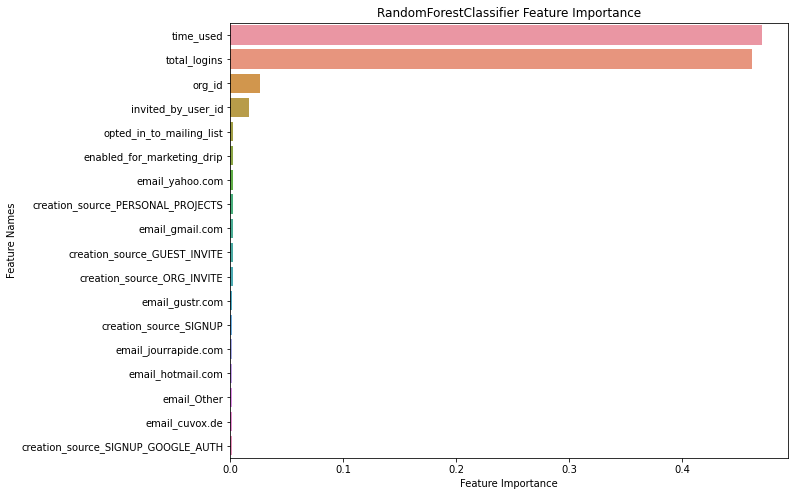

In [36]:
import seaborn as sns

# Create dataframe for feature importance
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X_train.columns)
feature_df = pd.DataFrame({'feature_names':feature_names, 'feature_importance':feature_importance})

# Sort dataframe by feature importance
feature_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'])
plt.title('RandomForestClassifier Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show();

# Conclusions

From the feature importance plot it is clear to see that the time_used and total_logins features are the most important indicators of whether a user will be adopted or not.  The next most important features are org_id and invited_by_user_id, though the difference in importance is huge.  This suggests that being part of an organization or being invited by another user might be something that influences a user being adopted, but in general it comes down to how long the user has been using the service and how many times in total they have used it.

Since these features are rather obvious indicators of frequent users, it might be more useful to see how the model performs without these features, and which of the remaining features it relies on to make decisions.

In [37]:
# Create new df without the two main features
alt_df = user_df.drop(['time_used', 'total_logins'], axis=1)
alt_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_Other,email_cuvox.de,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_yahoo.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,True,False,11,10803.0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,False,False,1,316.0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,False,False,94,1525.0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,False,False,1,5151.0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,False,False,193,5240.0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [38]:
# Create train/test split
X_alt = alt_df.drop('adopted_user', axis=1)
y_alt = alt_df['adopted_user']
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y_alt, test_size=0.3, random_state=16)
print(X_train_alt.shape, X_test_alt.shape, y_train_alt.shape, y_test_alt.shape)

(8372, 16) (3588, 16) (8372,) (3588,)


In [39]:
# Initiate and fit the model
rf_alt = RandomForestClassifier(random_state=16)
rf_alt.fit(X_train_alt, y_train_alt)

# Predict values
y_pred_alt = rf_alt.predict(X_test_alt)

In [40]:
# Print accuracy
print(accuracy_score(y_test_alt, y_pred_alt))

# Print classification report
print(classification_report(y_test_alt, y_pred_alt))

# Print confusion matrix
print(confusion_matrix(y_test_alt, y_pred_alt))

0.8096432552954292
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3091
           1       0.13      0.07      0.09       497

    accuracy                           0.81      3588
   macro avg       0.50      0.50      0.49      3588
weighted avg       0.76      0.81      0.78      3588

[[2871  220]
 [ 463   34]]


Surprisingly, the model did fairly well without the two most important features.  It still has an accuracy of almost 81%.

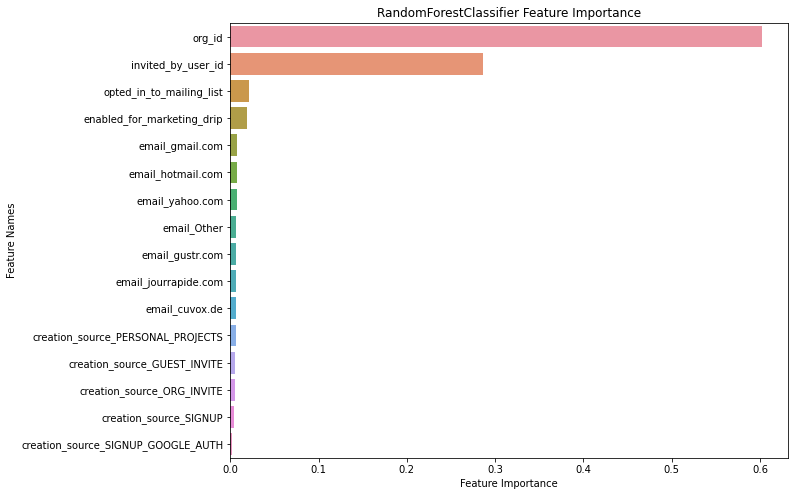

In [41]:
# Create dataframe for feature importance
feature_importance = np.array(rf_alt.feature_importances_)
feature_names = np.array(X_train_alt.columns)
feature_df = pd.DataFrame({'feature_names':feature_names, 'feature_importance':feature_importance})

# Sort dataframe by feature importance
feature_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'])
plt.title('RandomForestClassifier Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show();

As might have been expected, org_id and invited_by_user_id were the two most important features.  There is a steep drop off in importance, but the next two are related to the mailing list and the marketing drip.  It appears that Relax Inc might not have the most effective marketing strategy.  They may have more success convincing organizations to require employees or members to use product.  It might also help to have some sort of referral reward for users who invite other users to join.